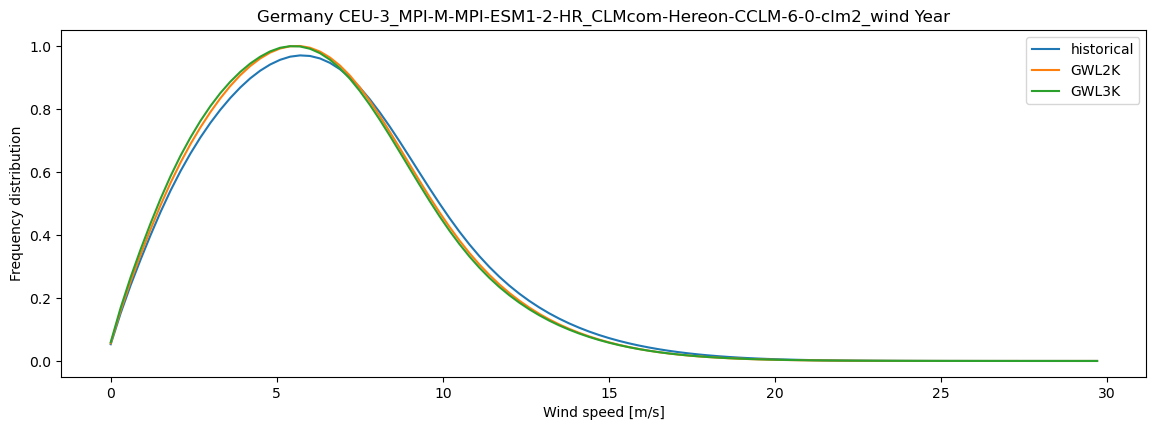

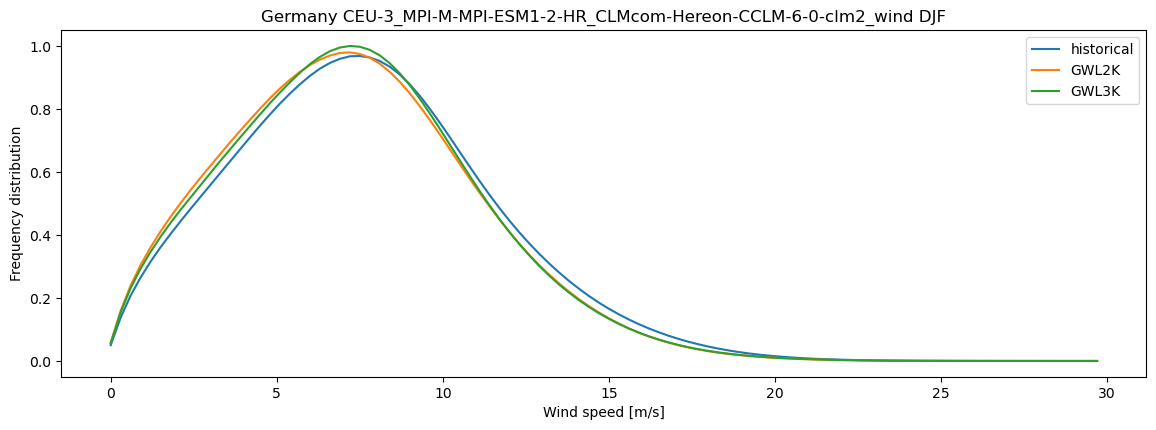

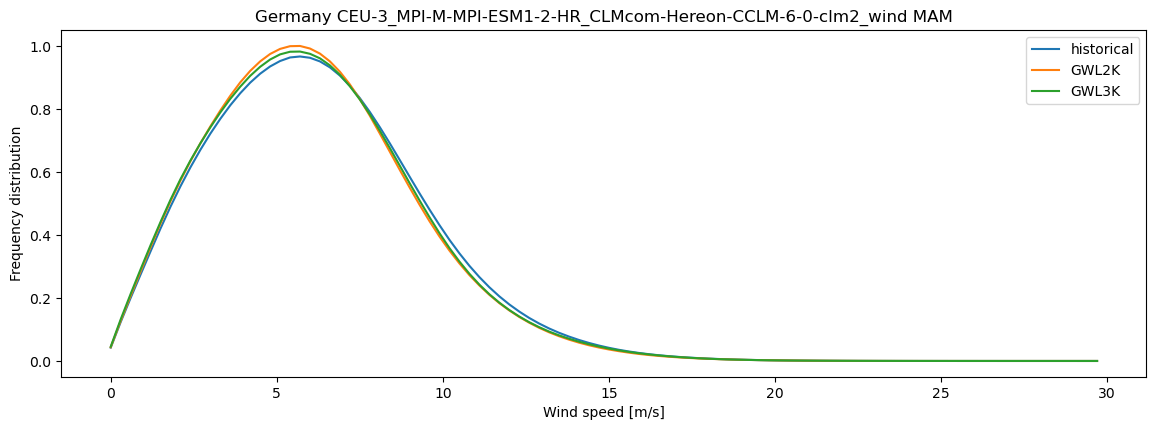

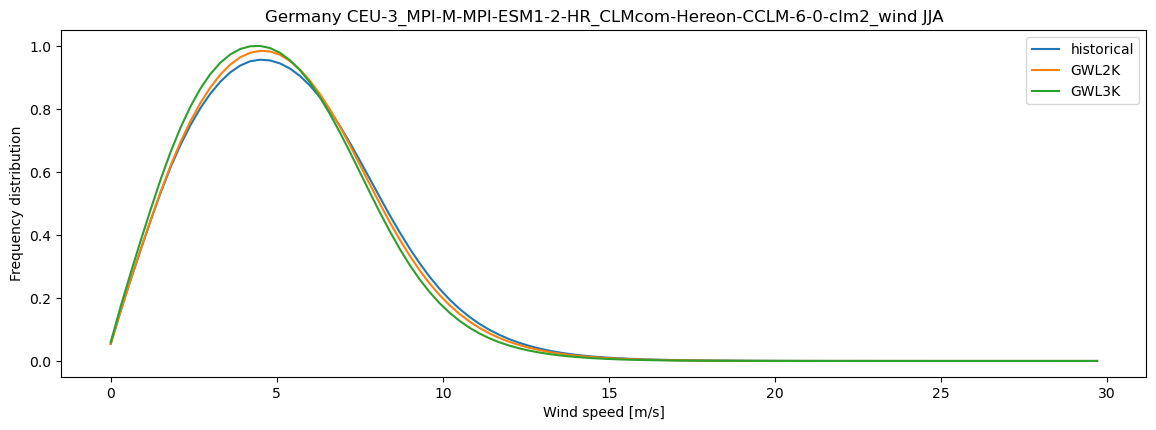

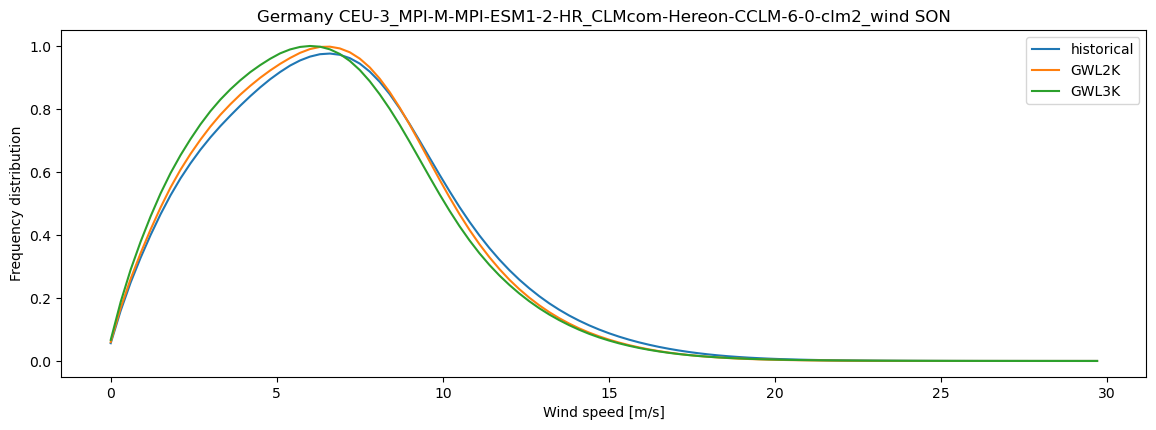

In [2]:
# sfcWind speed histogram
import json
import matplotlib.pyplot as plt
import numpy as np
with open("sfcWind/Germany.json", "r", encoding="utf-8") as file:
    wind_stats=json.load(file)
    Hereon_data=wind_stats["CEU-3_MPI-M-MPI-ESM1-2-HR_CLMcom-Hereon-CCLM-6-0-clm2_sfcWind"]
    edges=wind_stats["edges"]
    wind_hist=Hereon_data["historical"]
    wind_2K=Hereon_data["ssp370-GWL2K"]
    wind_3K=Hereon_data["ssp370-GWL3K"]

    for season in ["Year","DJF","MAM","JJA","SON"]:
        max_count=max(wind_hist[season]["counts"]+wind_2K[season]["counts"]+wind_3K[season]["counts"])
        plt.figure(figsize=(14, 4.5))
        labels=["historical","GWL2K","GWL3K"]
        for index, data in enumerate([wind_hist,wind_2K,wind_3K]):
            plt.plot(edges[:-1],np.array(data[season]["counts"])/max_count, label=labels[index])
            #plt.stairs(data["counts"], edges,label=labels[index])
        plt.title(f"Germany CEU-3_MPI-M-MPI-ESM1-2-HR_CLMcom-Hereon-CCLM-6-0-clm2_wind {season}")
        plt.ylabel("Frequency distribution")
        plt.xlabel("Wind speed [m/s]")
        plt.legend()
        plt.show()

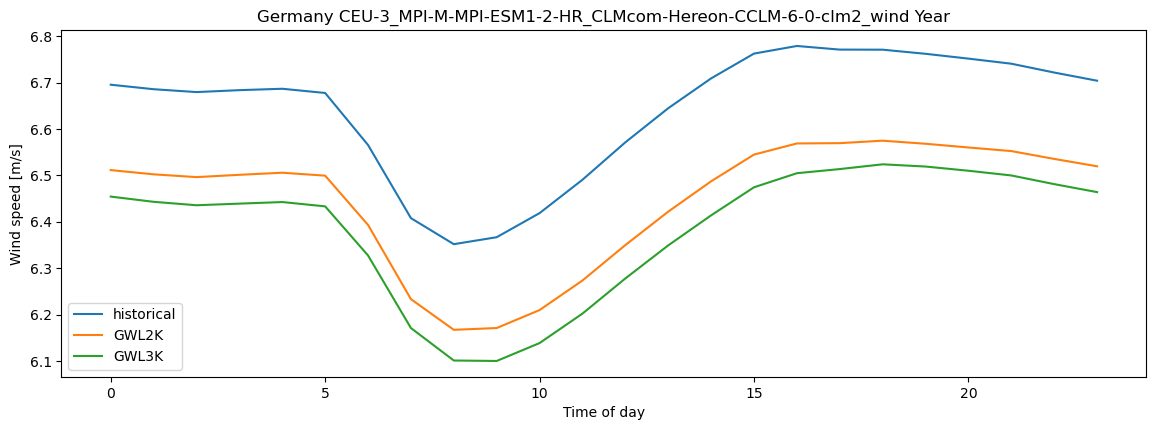

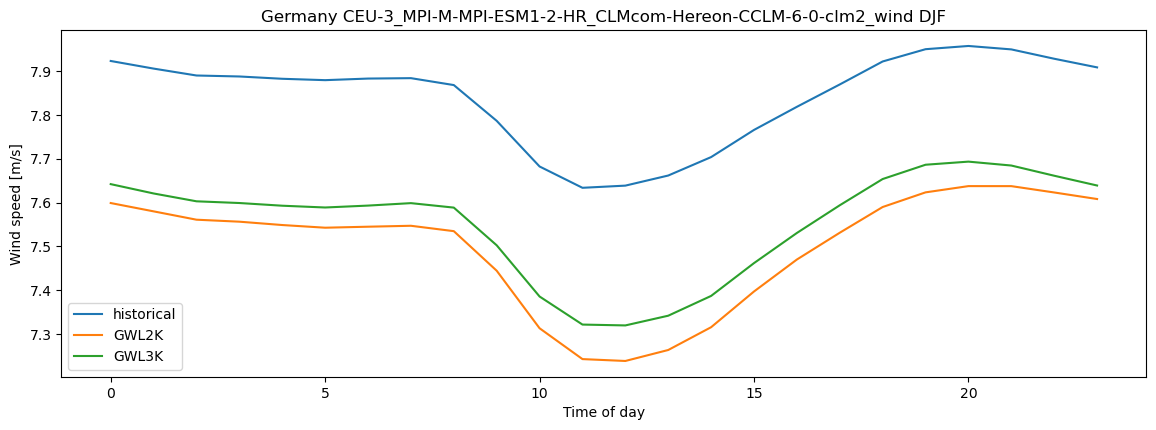

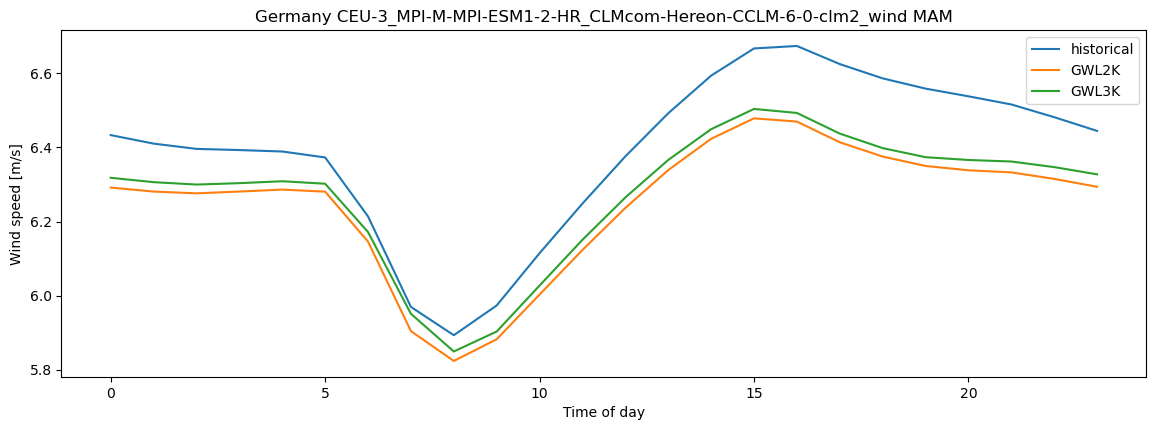

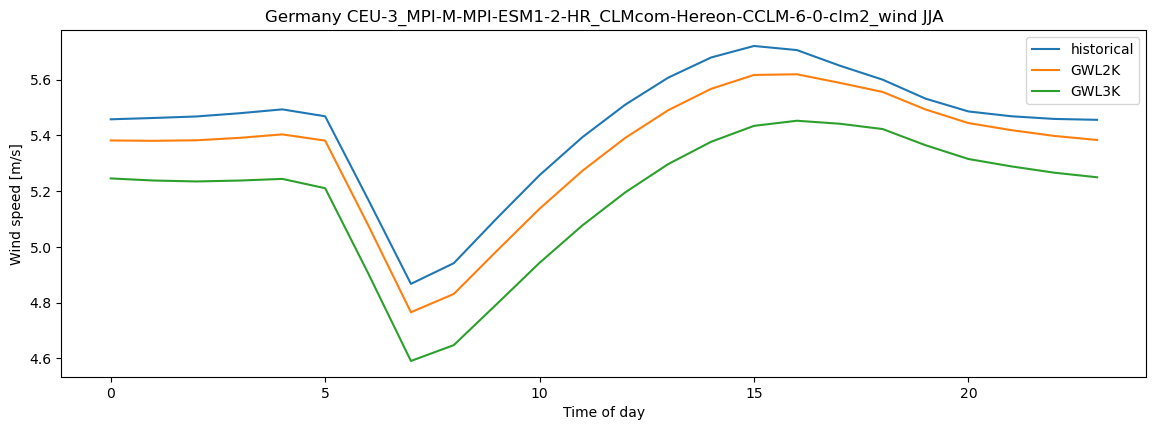

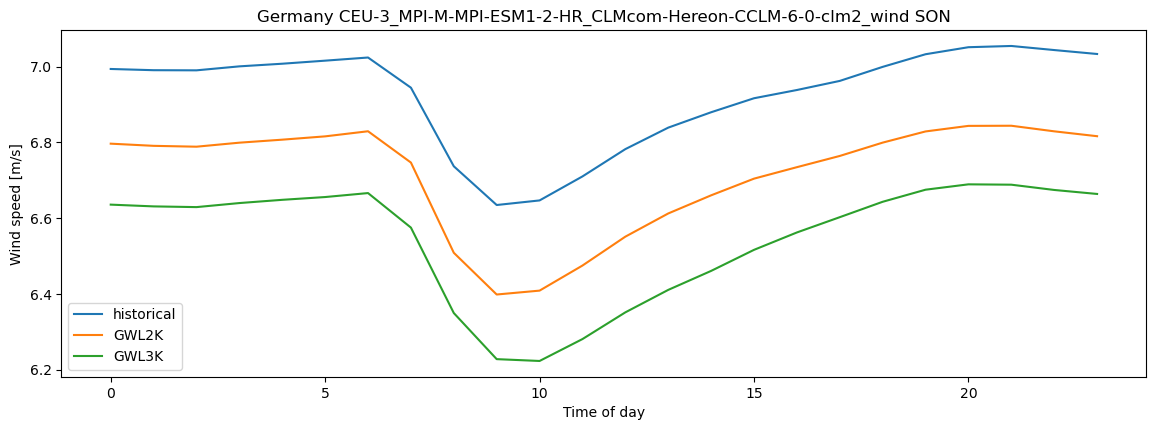

In [3]:
# Wind speed daily cycle
import json
import matplotlib.pyplot as plt
import numpy as np
with open("sfcWind/Germany.json", "r", encoding="utf-8") as file:
    wind_stats=json.load(file)
    Hereon_data=wind_stats["CEU-3_MPI-M-MPI-ESM1-2-HR_CLMcom-Hereon-CCLM-6-0-clm2_sfcWind"]
    wind_hist=Hereon_data["historical"]
    wind_2K=Hereon_data["ssp370-GWL2K"]
    wind_3K=Hereon_data["ssp370-GWL3K"]
    for season in ["Year","DJF","MAM","JJA","SON"]:
        plt.figure(figsize=(14, 4.5))
        labels=["historical","GWL2K","GWL3K"]
        for index, data in enumerate([wind_hist,wind_2K,wind_3K]):
            plt.plot(data[season]["diurnal_cycle"], label=labels[index])

        plt.title(f"Germany CEU-3_MPI-M-MPI-ESM1-2-HR_CLMcom-Hereon-CCLM-6-0-clm2_wind {season}")
        plt.ylabel("Wind speed [m/s]")
        plt.xlabel("Time of day")
        plt.legend()
        plt.show()

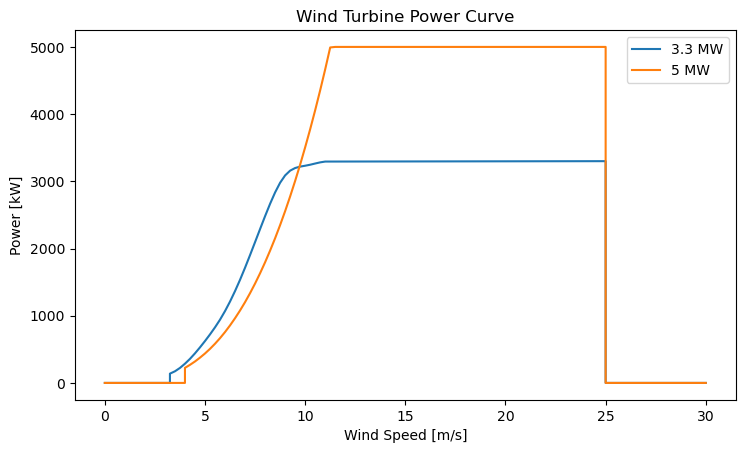

In [4]:
# Wind turbine power curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
_WIND_3_3 = np.array(
    [   0,
        3.25,
        3.25,
        3.5,
        3.75,
        4.0,
        4.25,
        4.5,
        4.75,
        5.0,
        5.25,
        5.5,
        5.75,
        6.0,
        6.25,
        6.5,
        6.75,
        7.0,
        7.25,
        7.5,
        7.75,
        8.0,
        8.25,
        8.5,
        8.75,
        9.0,
        9.25,
        9.5,
        9.75,
        10.0,
        10.25,
        10.5,
        10.75,
        11.0,
        25,
        25,
        30,
    ],
    dtype=np.float32,
)

_POWER_3_3 = (
    np.array(
        [0,
         0,
            138,
            173,
            223,
            286,
            358,
            440,
            529,
            623,
            722,
            827,
            941,
            1069,
            1211,
            1367,
            1535,
            1715,
            1903,
            2096,
            2290,
            2482,
            2666,
            2835,
            2979,
            3088,
            3159,
            3198,
            3219,
            3232,
            3247,
            3265,
            3282,
            3294,
            3300,
            0,
            0
        ],
        dtype=np.float32,
    )
)

_WIND_5 = np.array(
    [   0,
        4,
        4,
        4.25,
        4.5,
        4.75,
        5,
        5.25,
        5.5,
        5.75,
        6,
        6.25,
        6.5,
        6.75,
        7,
        7.25,
        7.5,
        7.75,
        8,
        8.25,
        8.5,
        8.75,
        9,
        9.25,
        9.5,
        9.75,
        10,
        10.25,
        10.5,
        10.75,
        11,
        11.25,
        11.5,
        25,
        25,
        30
    ],
    dtype=np.float32,
)

_POWER_5 = (
    np.array(
        [
            0,
            0,
            224,
            269,
            319,
            376,
            438,
            507,
            583,
            666,
            757,
            856,
            963,
            1078,
            1202,
            1336,
            1479,
            1632,
            1795,
            1969,
            2153,
            2349,
            2556,
            2775,
            3006,
            3249,
            3506,
            3775,
            4058,
            4355,
            4666,
            4992,
            5000,
            5000,
            0,
            0
        ],
        dtype=np.float32,
    )
)
fig, ax = plt.subplots(figsize=(8.53, 4.8)) 
#ax.plot(df["Wind Speed [m/s]"],df["Power [kW]"],label="5MW")
ax.plot(_WIND_3_3,_POWER_3_3,label="3.3 MW")
ax.plot(_WIND_5,_POWER_5,label="5 MW")
ax.set_xlabel("Wind Speed [m/s]")
ax.set_ylabel("Power [kW]")
ax.set_title("Wind Turbine Power Curve")
plt.legend()
plt.savefig("wind_turbine_power_curve.pdf", bbox_inches="tight", format="pdf", dpi=300)
plt.show()

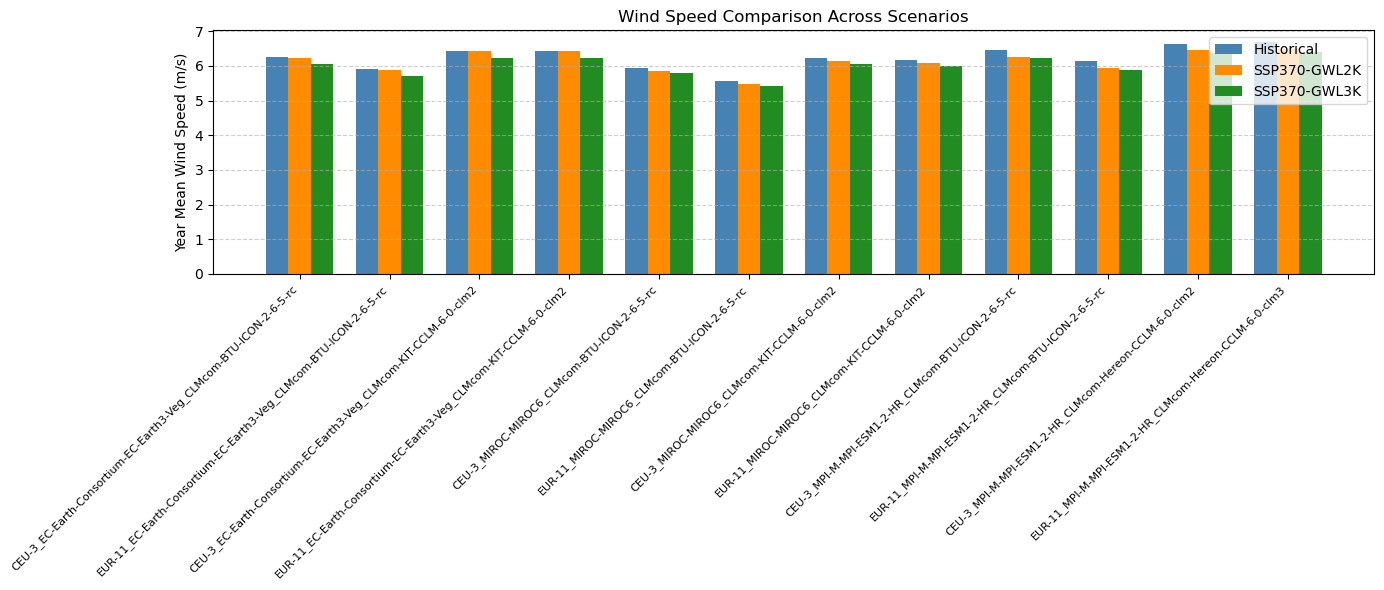

In [ ]:
#Mean wind speed changes
import json
import matplotlib.pyplot as plt
import numpy as np

# Load wind statistics from JSON file
with open("sfcWind/Germany.json", "r", encoding="utf-8") as file:
    wind_stats = json.load(file)

# Define scenarios and season of interest
wanted_scenarios = ["historical", "ssp370-GWL2K", "ssp370-GWL3K"]
season = "Year"

# Prepare data containers
dataset_names = []
scenario_means = {scenario: [] for scenario in wanted_scenarios}

# Extract data
for dataset_name, dataset in wind_stats.items():
    if dataset_name == "edges":
        continue
    if all(scenario in dataset for scenario in wanted_scenarios):
        dataset_names.append(dataset_name)
        for scenario in wanted_scenarios:
            mean_value = dataset[scenario][season]["mean"]
            scenario_means[scenario].append(mean_value)

# Plotting
x = np.arange(len(dataset_names))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(x - width, scenario_means["historical"], width, label="Historical", color="steelblue")
ax.bar(x, scenario_means["ssp370-GWL2K"], width, label="SSP370-GWL2K", color="darkorange")
ax.bar(x + width, scenario_means["ssp370-GWL3K"], width, label="SSP370-GWL3K", color="forestgreen")

dataset_clean_names=[name.replace("_sfcWind","") for name in dataset_names]
# Formatting
ax.set_ylabel("Year Mean Wind Speed (m/s)")
ax.set_title("Wind Speed Comparison Across Scenarios")
ax.set_xticks(x)
ax.set_xticklabels(dataset_clean_names, rotation=45, ha="right", fontsize=8)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


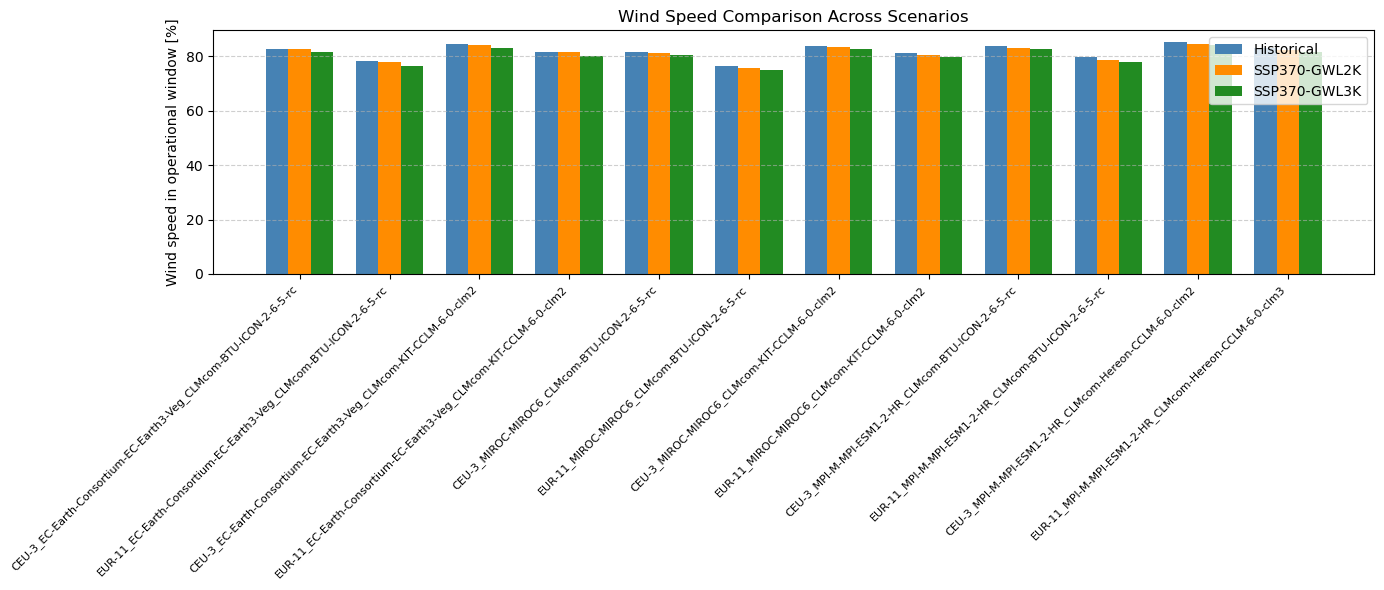

In [ ]:
#Percentage of data in operational range
#Mean wind speed changes
import json
import matplotlib.pyplot as plt
import numpy as np

# Load wind statistics from JSON file
with open("sfcWind/Germany.json", "r", encoding="utf-8") as file:
    wind_stats = json.load(file)

# Define scenarios and season of interest
wanted_scenarios = ["historical", "ssp370-GWL2K", "ssp370-GWL3K"]
season = "Year"

# Prepare data containers
dataset_names = []
scenario_means = {scenario: [] for scenario in wanted_scenarios}

# Extract data
for dataset_name, dataset in wind_stats.items():
    if dataset_name == "edges":
        continue
    if all(scenario in dataset for scenario in wanted_scenarios):
        dataset_names.append(dataset_name)
        for scenario in wanted_scenarios:
            mean_value = dataset[scenario][season]["nominal"]
            scenario_means[scenario].append(mean_value*100)

# Plotting
x = np.arange(len(dataset_names))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(x - width, scenario_means["historical"], width, label="Historical", color="steelblue")
ax.bar(x, scenario_means["ssp370-GWL2K"], width, label="SSP370-GWL2K", color="darkorange")
ax.bar(x + width, scenario_means["ssp370-GWL3K"], width, label="SSP370-GWL3K", color="forestgreen")

dataset_clean_names=[name.replace("_sfcWind","") for name in dataset_names]
# Formatting
ax.set_ylabel("Wind speed in operational window [%]")
ax.set_title("Wind speed in operational window")
ax.set_xticks(x)
ax.set_xticklabels(dataset_clean_names, rotation=45, ha="right", fontsize=8)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
#CF_Wind speed changes timemean compared to historical
